# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

from newsapi import NewsApiClient

[nltk_data] Downloading package vader_lexicon to C:\Users\Chris
[nltk_data]     Chan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")
type(api_key)

str

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(q="bitcoin", language="en")

In [5]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(q="Ethereum", language="en")

In [6]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_df = pd.DataFrame.from_dict(bitcoin_headlines["articles"])
bitcoin_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'engadget', 'name': 'Engadget'}",https://www.engadget.com/about/editors/richard...,Tesla 'suspends' Bitcoin car purchases citing ...,You can't buy a Tesla with Bitcoin anymore..,https://www.engadget.com/elon-musk-bitcoin-221...,https://s.yimg.com/os/creatr-uploaded-images/2...,2021-05-12T22:17:08Z,Just weeks after Tesla started accepting Bitco...
1,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Alex Wilhelm,What Square’s smashing earnings tell us about ...,Today we're talking Square earnings and its bi...,http://techcrunch.com/2021/05/07/what-squares-...,https://techcrunch.com/wp-content/uploads/2020...,2021-05-07T18:17:36Z,Shares of Square are up more than 6% today aft...
2,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Rebecca Bellan,Tesla sees bitcoin as important financial tool...,Tesla’s relationship with bitcoin is not a dal...,http://techcrunch.com/2021/04/26/tesla-sees-bi...,https://techcrunch.com/wp-content/uploads/2021...,2021-04-27T01:36:46Z,Tesla’s relationship with bitcoin is not a dal...
3,"{'id': None, 'name': 'Lifehacker.com'}",Mike Winters,"You Can Now Exchange Crypto on Venmo, If You'r...",Cryptocurrency continues to gain mainstream ac...,https://twocents.lifehacker.com/you-can-now-ex...,https://i.kinja-img.com/gawker-media/image/upl...,2021-04-20T19:00:00Z,Cryptocurrency continues to gain mainstream ac...
4,"{'id': 'the-verge', 'name': 'The Verge'}",Sean O'Kane,Tesla stops taking Bitcoin for vehicle purchas...,Tesla has stopped accepting bitcoin as payment...,https://www.theverge.com/2021/5/12/22433153/te...,https://cdn.vox-cdn.com/thumbor/zRfsIkD2Sr-2KD...,2021-05-12T22:21:15Z,Image: Tesla\r\n\n \n\n Tesla has stopped acce...


In [7]:
# Create the Ethereum sentiment scores DataFrame
ethereum_df = pd.DataFrame.from_dict(ethereum_headlines["articles"])
ethereum_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Manish Singh,Vitalik Buterin donates $1 billion worth of ‘m...,"Vitalik Buterin, the creator of Ethereum, on W...",http://techcrunch.com/2021/05/12/vitalik-buter...,https://techcrunch.com/wp-content/uploads/2017...,2021-05-12T22:46:10Z,"Vitalik Buterin, the creator of Ethereum, on W..."
1,"{'id': 'techcrunch', 'name': 'TechCrunch'}",David Riggs,Radical Ethereum entrepreneurs are redefining ...,Their investors call them disruptive innovator...,http://techcrunch.com/2021/05/04/radical-ether...,https://techcrunch.com/wp-content/uploads/2021...,2021-05-04T14:30:39Z,Their investors call them disruptive innovator...
2,"{'id': None, 'name': 'Lifehacker.com'}",Mike Winters,"You Can Now Exchange Crypto on Venmo, If You'r...",Cryptocurrency continues to gain mainstream ac...,https://twocents.lifehacker.com/you-can-now-ex...,https://i.kinja-img.com/gawker-media/image/upl...,2021-04-20T19:00:00Z,Cryptocurrency continues to gain mainstream ac...
3,"{'id': 'mashable', 'name': 'Mashable'}",Stan Schroeder,Venmo now lets users buy and sell Bitcoin and ...,Venmo is jumping aboard the cryptocurrency ban...,https://mashable.com/article/venmo-crypto/,https://mondrian.mashable.com/2021%252F04%252F...,2021-04-20T11:23:13Z,Venmo is jumping aboard the cryptocurrency ban...
4,"{'id': 'cnn', 'name': 'CNN'}","Paul R. La Monica, CNN Business","Move over, Bitcoin. Ethereum is at an all-time...",Bitcoin prices continued their rebound Saturda...,https://www.cnn.com/2021/05/01/investing/ether...,https://cdn.cnn.com/cnnnext/dam/assets/2105010...,2021-05-01T17:24:45Z,New York (CNN Business)Bitcoin prices continue...


In [8]:
# Describe the Bitcoin Sentiment
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result


bitcoin_text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
    "text_content": [],
}


for index, row in bitcoin_df.iterrows():
    try:
        # Sentiment scoring with VADER
        text_sentiment = analyzer.polarity_scores(row["content"])
        bitcoin_text_sent["text_compound"].append(text_sentiment["compound"])
        bitcoin_text_sent["text_pos"].append(text_sentiment["pos"])
        bitcoin_text_sent["text_neu"].append(text_sentiment["neu"])
        bitcoin_text_sent["text_neg"].append(text_sentiment["neg"])
        bitcoin_text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
        bitcoin_text_sent["text_content"].append(row["content"])       
    except AttributeError:
        pass

bitcoin_sentiment_df = pd.DataFrame(bitcoin_text_sent)
bitcoin_sentiment_df.describe()

,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.325535,0.087700,0.899500,0.012850,0.600000
std,0.349802,0.075245,0.080753,0.026867,0.598243
min,-0.476700,0.000000,0.777000,0.000000,-1.000000
25%,0.000000,0.000000,0.824750,0.000000,0.000000
50%,0.342950,0.071000,0.924000,0.000000,1.000000
75%,0.634375,0.160250,0.974500,0.000000,1.000000
max,0.845500,0.217000,1.000000,0.081000,1.000000


In [9]:
# Describe the Ethereum Sentiment

ethereum_text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
    "text_content": [],
}


for index, row in ethereum_df.iterrows():
    try:
        # Sentiment scoring with VADER
        text_sentiment = analyzer.polarity_scores(row["content"])
        ethereum_text_sent["text_compound"].append(text_sentiment["compound"])
        ethereum_text_sent["text_pos"].append(text_sentiment["pos"])
        ethereum_text_sent["text_neu"].append(text_sentiment["neu"])
        ethereum_text_sent["text_neg"].append(text_sentiment["neg"])
        ethereum_text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
        ethereum_text_sent["text_content"].append(row["content"])   
    except AttributeError:
        pass

ethereum_sentiment_df = pd.DataFrame(ethereum_text_sent)
ethereum_sentiment_df.describe()

,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.129260,0.042950,0.947800,0.009250,0.300000
std,0.286019,0.059597,0.064753,0.029097,0.656947
min,-0.340000,0.000000,0.790000,0.000000,-1.000000
25%,0.000000,0.000000,0.924000,0.000000,0.000000
50%,0.000000,0.017000,0.960000,0.000000,0.000000
75%,0.238025,0.060500,1.000000,0.000000,1.000000
max,0.817600,0.210000,1.000000,0.111000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addons = {'happy', 'dogecoin', 'elonmusk','investor'}

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
    
    # Remove the stop words
    
    
    return tokens

In [13]:
# Create a new tokens column for Bitcoin
bitcoin_sentiment_df['tokens'] = bitcoin_sentiment_df.text_content.apply(tokenizer)
bitcoin_sentiment_df.head()

,text_compound,text_pos,text_neu,text_neg,text_sent,text_content,tokens
0,0.3818,0.071,0.929,0.00,1,Just weeks after Tesla started accepting Bitco...,"[week, tesla, started, accepting, bitcoin, cur..."
1,0.2960,0.058,0.942,0.00,1,Shares of Square are up more than 6% today aft...,"[shares, square, today, american, fintech, com..."
2,0.0000,0.000,1.000,0.00,0,Tesla’s relationship with bitcoin is not a dal...,"[teslas, relationship, bitcoin, dalliance, acc..."
3,0.7506,0.171,0.829,0.00,1,Cryptocurrency continues to gain mainstream ac...,"[cryptocurrency, continues, gain, mainstream, ..."
4,0.4939,0.134,0.816,0.05,1,Image: Tesla\r\n\n \n\n Tesla has stopped acce...,"[image, tesla, tesla, ha, stopped, accepting, ..."


In [14]:
# Create a new tokens column for Ethereum
ethereum_sentiment_df['tokens'] = ethereum_sentiment_df.text_content.apply(tokenizer)
ethereum_sentiment_df.head()

,text_compound,text_pos,text_neu,text_neg,text_sent,text_content,tokens
0,0.2263,0.060,0.940,0.000,1,"Vitalik Buterin, the creator of Ethereum, on W...","[vitalik, buterin, creator, ethereum, wednesda..."
1,-0.2144,0.054,0.835,0.111,-1,Their investors call them disruptive innovator...,"[call, disruptive, innovator, detractors, like..."
2,0.7506,0.171,0.829,0.000,1,Cryptocurrency continues to gain mainstream ac...,"[cryptocurrency, continues, gain, mainstream, ..."
3,0.0258,0.034,0.966,0.000,0,Venmo is jumping aboard the cryptocurrency ban...,"[venmo, jumping, aboard, cryptocurrency, bandw..."
4,0.0000,0.000,1.000,0.000,0,New York (CNN Business)Bitcoin prices continue...,"[new, york, cnn, businessbitcoin, price, conti..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
N = 2
grams = ngrams(tokenizer(bitcoin_sentiment_df.text_content.str.cat()), N)
Counter(grams).most_common(20)

[(('elon', 'musk'), 4),
 (('accepting', 'bitcoin'), 3),
 (('said', 'monday'), 3),
 (('charsby', 'reuters'), 3),
 (('tesla', 'ha'), 2),
 (('fossil', 'fuel'), 2),
 (('ceo', 'elon'), 2),
 (('price', 'continued'), 2),
 (('ha', 'seen'), 2),
 (('microstrategy', 'inc'), 2),
 (('inc', 'major'), 2),
 (('major', 'bitcoin'), 2),
 (('bitcoin', 'corporate'), 2),
 (('corporate', 'backer'), 2),
 (('backer', 'said'), 2),
 (('monday', 'nonemployee'), 2),
 (('nonemployee', 'director'), 2),
 (('director', 'get'), 2),
 (('get', 'fee'), 2),
 (('fee', 'service'), 2)]

In [17]:
# Generate the Ethereum N-grams where N=2
N = 2
grams = ngrams(tokenizer(ethereum_sentiment_df.text_content.str.cat()), N)
Counter(grams).most_common(20)

[(('charsby', 'reuters'), 4),
 (('representation', 'virtual'), 4),
 (('virtual', 'currency'), 4),
 (('currency', 'ethereum'), 4),
 (('ethereum', 'seen'), 4),
 (('seen', 'front'), 4),
 (('front', 'stock'), 4),
 (('stock', 'graph'), 4),
 (('graph', 'illustration'), 4),
 (('illustration', 'taken'), 4),
 (('taken', 'february'), 4),
 (('february', 'reutersdado'), 4),
 (('bitcoin', 'ethereum'), 3),
 (('ether', 'hit'), 3),
 (('hit', 'record'), 3),
 (('record', 'high'), 3),
 (('may', 'reuters'), 3),
 (('vitalik', 'buterin'), 2),
 (('charsnew', 'york'), 2),
 (('reuters', 'stafffile'), 2)]

In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Use token_count to get the top 10 words for Bitcoin
bitcion_tokens = tokenizer(bitcoin_sentiment_df.text_content.str.cat())
token_count(bitcion_tokens, 10)

[('bitcoin', 14),
 ('ha', 8),
 ('tesla', 7),
 ('musk', 6),
 ('reuters', 5),
 ('elon', 4),
 ('company', 4),
 ('monday', 4),
 ('service', 4),
 ('said', 4)]

In [20]:
# Use token_count to get the top 10 words for Ethereum
ethereum_tokens = tokenizer(ethereum_sentiment_df.text_content.str.cat())
token_count(ethereum_tokens, 10)

[('ethereum', 11),
 ('reuters', 7),
 ('currency', 6),
 ('stock', 6),
 ('bitcoin', 5),
 ('cryptocurrency', 5),
 ('ha', 4),
 ('project', 4),
 ('charsby', 4),
 ('representation', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

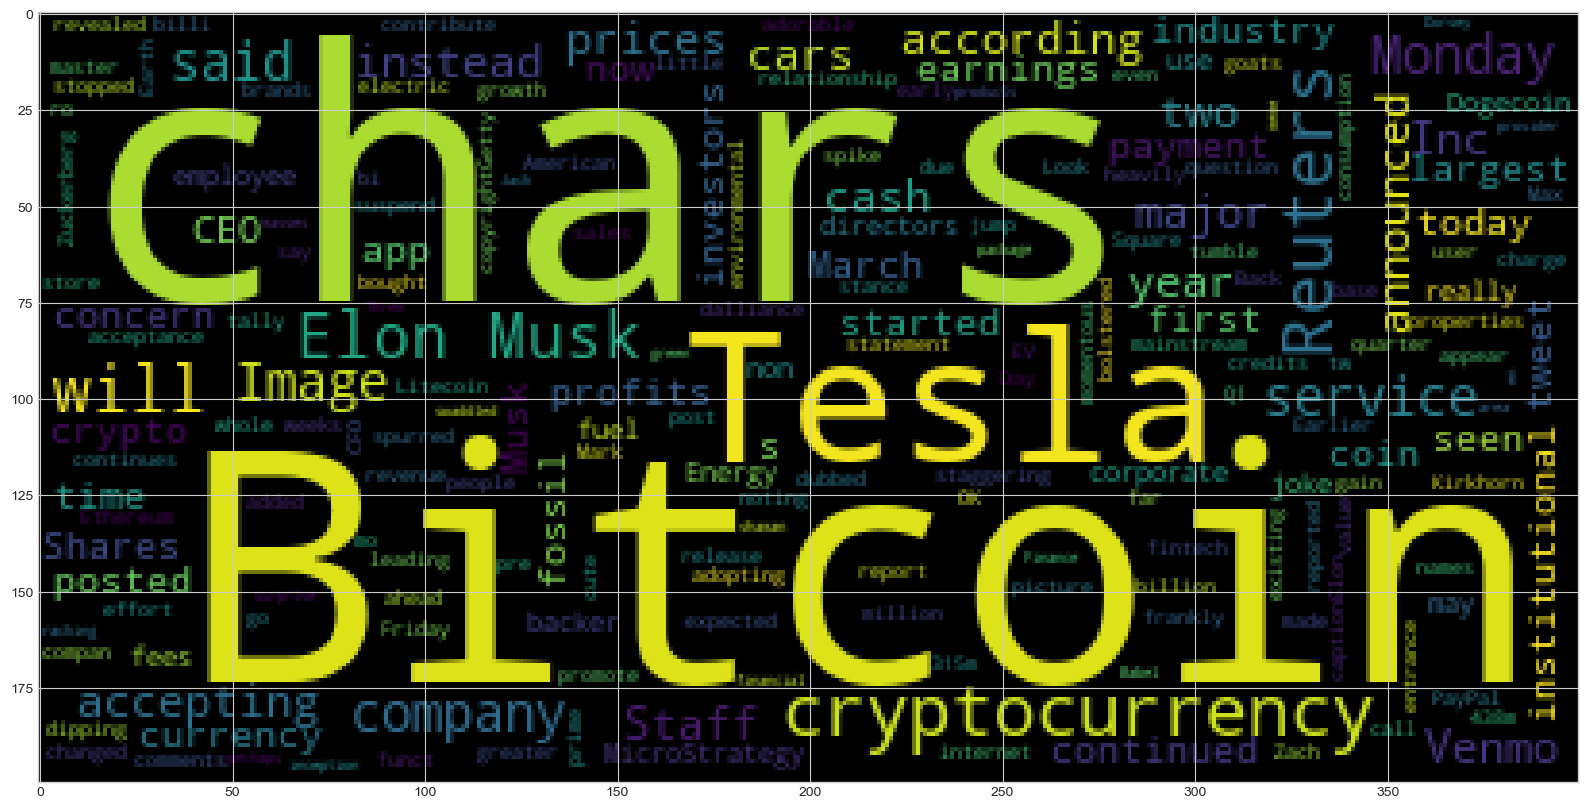

In [22]:
# Generate the Bitcoin word cloud
bitcoin_wc = WordCloud().generate(bitcoin_sentiment_df.text_content.str.cat())
plt.imshow(bitcoin_wc)

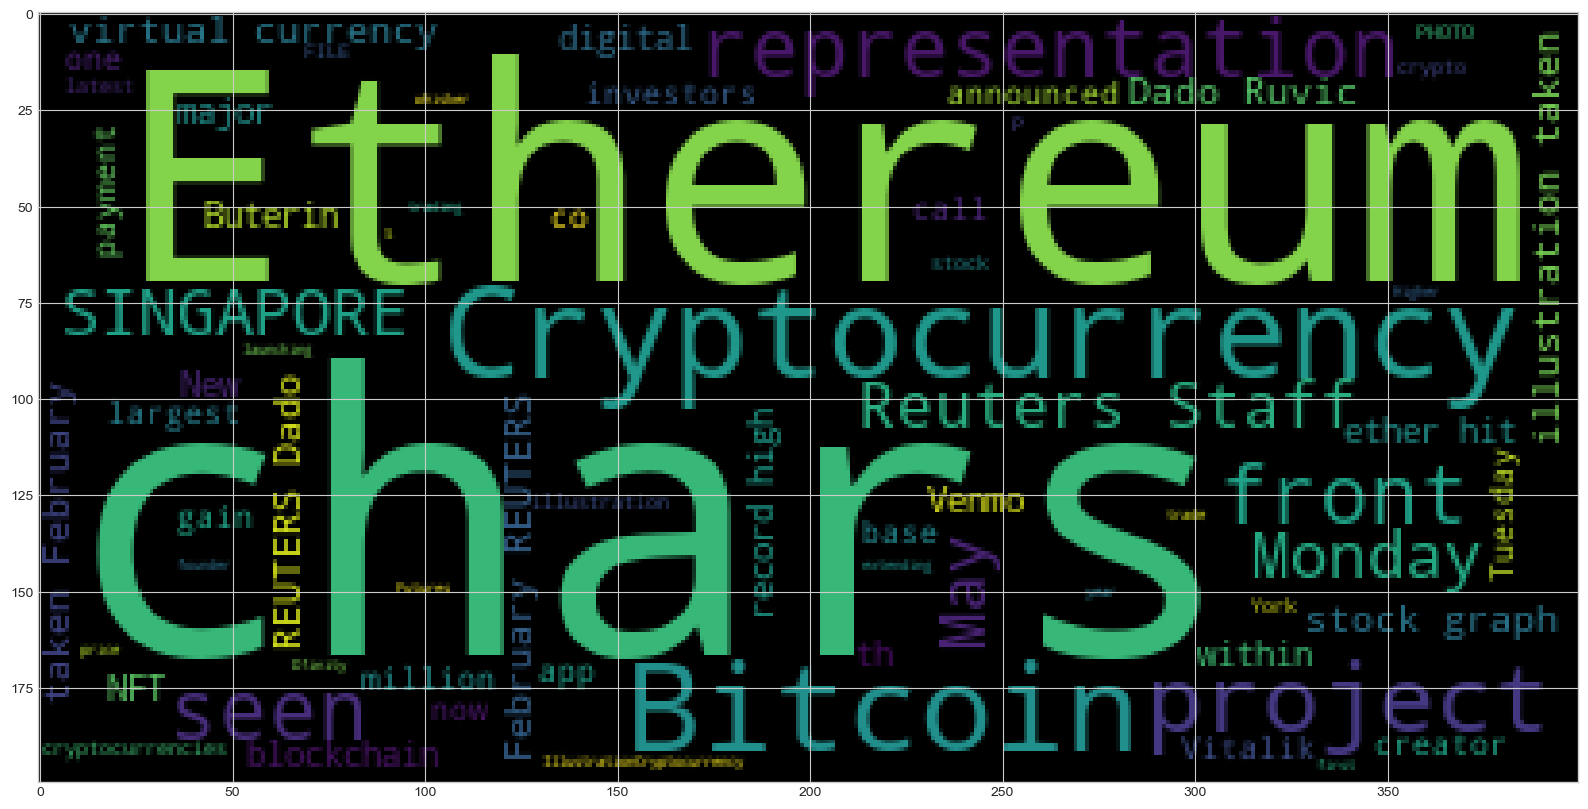

In [23]:
# Generate the Ethereum word cloud
ethereum_wc = WordCloud().generate(ethereum_sentiment_df.text_content.str.cat())
plt.imshow(ethereum_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [26]:
import spacy
from spacy import displacy

In [27]:
# Download the language model for SpaCy
#!python -m spacy download en_core_web_sm

In [28]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [29]:
# Concatenate all of the Bitcoin text together
bitcoin_text = bitcoin_sentiment_df.text_content.str.cat()
bitcoin_text

'Just weeks after Tesla started accepting Bitcoin as currency for cars, Elon Musk revealed in a tweet that it will "suspend" the effort. According to the release (Tesla does not appear to have a funct… [+768 chars]Shares of Square are up more than 6% today after the American fintech company reported a staggering $5.06 billion in revenue in its Q1 2021 earnings report, far ahead of an expected tally of $3.36 bi… [+2045 chars]Tesla’s relationship with bitcoin is not a dalliance, according to the comments made by the company’s CFO and dubbed “master of coin” Zach Kirkhorn during an earnings call Monday. Instead, the compan… [+3073 chars]Cryptocurrency continues to gain mainstream acceptance, as PayPal announced that they have added Bitcoin, Ethereum, Bitcoin Cash, and Litecoin to its Venmo app. With a user base of 70 million, the mo… [+2782 chars]Image: Tesla\r\n\n \n\n Tesla has stopped accepting bitcoin as payment for its cars out of concern that it will contribute to greater consumptio

In [32]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(bitcoin_text)

# Add a title to the document
bitcoin_doc.user_data["title"] = "Bitcoin NER"

In [33]:
# Render the visualization
displacy.render(bitcoin_doc, style='ent', jupyter=True)

In [34]:
# List all Entities
for x in bitcoin_doc.ents:
    print(x.text, x.label_)

Just weeks DATE
Tesla ORG
Bitcoin PERSON
Elon Musk PERSON
Square FAC
more than 6% PERCENT
today DATE
American NORP
$5.06 billion MONEY
2021 DATE
3.36 MONEY
CFO ORG
Zach Kirkhorn PERSON
Monday DATE
PayPal ORG
Bitcoin, Ethereum ORG
Bitcoin Cash PERSON
Litecoin PERSON
Venmo PERSON
70 million CARDINAL
Tesla ORG
Elon Musk PERSON
Friday DATE
Bitcoin PERSON
50,000 MONEY
first ORDINAL
early March DATE
Bitcoin PERSON
a momentous year DATE
2020 DATE
Zuckerberg PERSON
two CARDINAL
Max PERSON
Bitcoin PERSON
Elon Musk PERSON
March DATE
Musk PERSON
Tesla PERSON
Earlier this year DATE
EV ORG
1.5 MONEY
Musk PERSON
Tesla PERSON
Tesla PERSON
first quarter DATE
$438m MONEY
315 MONEY
Bitcoin ORG
Jack Dorsey PERSON
Babel Finance ORG
Monday DATE
Tuesday DATE
Venmo PERSON
Four CARDINAL
chars]New York GPE
CNN ORG
Saturday DATE
about 6% PERCENT
nearly $58,000 MONEY
Reuters ORG
Reuters ORG
Inc PERSON
Monday DATE
two CARDINAL
Crusoe Energy ORG
two CARDINAL
today DATE
Musk PERSON
Dogecoin GPE
Twitter PRODUCT
Doge

---

### Ethereum NER

In [35]:
# Concatenate all of the Ethereum text together
ethereum_text = ethereum_sentiment_df.text_content.str.cat()
ethereum_text

'Vitalik Buterin, the creator of Ethereum, on Wednesday donated Ethereum and meme coins worth $1.5 billion in one of the largest-ever individual philanthropy efforts.\r\nButerin transferred 500 ETH and … [+1667 chars]Their investors call them disruptive innovators. Detractors like North Carolina Attorney General Josh Stein call them dirty scammers. But Leda Health co-founders Madison Campbell and Liesel Vaidya th… [+8679 chars]Cryptocurrency continues to gain mainstream acceptance, as PayPal announced that they have added Bitcoin, Ethereum, Bitcoin Cash, and Litecoin to its Venmo app. With a user base of 70 million, the mo… [+2782 chars]Venmo is jumping aboard the cryptocurrency bandwagon.\xa0\r\nThe social payment service announced on Tuesday that its customers can now buy, hold, and sell cryptocurrencies within the Venmo app.\xa0\r\nFour cr… [+1524 chars]New York (CNN Business)Bitcoin prices continued their rebound Saturday, rising about 6% to nearly $58,000. But the world\'s largest

In [36]:
# Run the NER processor on all of the text
ethereum_doc = nlp(ethereum_text)

# Add a title to the document
ethereum_doc.user_data["title"] = "Ethereum NER"

In [37]:
# Render the visualization
displacy.render(ethereum_doc, style='ent', jupyter=True)

In [38]:
# List all Entities
for x in ethereum_doc.ents:
    print(x.text, x.label_)

Vitalik Buterin PERSON
Ethereum ORG
Wednesday DATE
Ethereum ORG
$1.5 billion MONEY
Buterin PERSON
500 CARDINAL
ETH ORG
North Carolina GPE
Josh Stein PERSON
Madison Campbell PERSON
Liesel Vaidya PERSON
PayPal ORG
Bitcoin, Ethereum ORG
Bitcoin Cash PERSON
Litecoin PERSON
Venmo PERSON
70 million CARDINAL
Tuesday DATE
Venmo PERSON
Four CARDINAL
chars]New York GPE
CNN ORG
Saturday DATE
about 6% PERCENT
nearly $58,000 MONEY
CryptoPunks ORG
one CARDINAL
NFT ORG
Meebits PRODUCT
20,000 CARDINAL
3D ORG
Ethereum ORG
$65 million MONEY
J.P. Morgan PERSON
Mastercard PERSON
UBS AG ORG
Reuters ORG
February 19, 2021 DATE
SINGAPORE GPE
February 19, 2021 DATE
Dado Ruvic/IllustrationCryptocurrency PERSON
Dfinity ORG
July 2018 DATE
Swiss NORP
Dominic Williams PERSON
StockMarketUS Stock Futures Edge Higher ORG
Monday DATE
U.S. GPE
Monday DATE
Topps GPE
first ORDINAL
NFT ORG
Spanish NORP
AI ORG
Cryptocurrencies ORG
today DATE
Vitalik Buterin PERSON
27-year-old DATE
Dow Jones Indices ORG
February 19, 2021 DAT

---